<a href="https://colab.research.google.com/github/ArmandoActuaria524/University_Projects/blob/main/Proyecto_VaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import chi2

In [ ]:
np.set_printoptions(precision = 8, suppress = True) #Evitar notacion Cientifica

##Obtenga un histórico de precios de 5 años y con esta información estime rendimientosanuales y la desviación estándar anual, además obtenga las matrices Var-Cov y de correlaciones de los 5 activos para rendimientos anuales

In [ ]:
emisora = ['GFNORTEO.MX','GRUMAB.MX','TLEVISACPO.MX','GFINBURO.MX','TSLA.MX']
fi = '2019-04-3'
ff = '2024-04-4'

In [ ]:
df = yf.download(emisora, start = fi, end = ff)['Close'].reset_index()
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True)
df

[*********************100%%**********************]  5 of 5 completed


Ticker,Date,GFINBURO.MX,GFNORTEO.MX,GRUMAB.MX,TLEVISACPO.MX,TSLA.MX
0,2019-04-03,27.120001,108.949997,198.070007,42.020000,373.556000
1,2019-04-04,27.400000,112.760002,198.869995,42.299999,343.124664
2,2019-04-05,27.740000,116.150002,198.029999,41.910000,349.873322
3,2019-04-08,27.510000,118.830002,199.100006,41.660000,346.000000
4,2019-04-09,28.209999,118.599998,201.029999,41.480000,343.333344
...,...,...,...,...,...,...
1254,2024-03-26,50.619999,177.440002,305.940002,10.340000,2963.429932
1255,2024-03-27,51.070000,176.660004,311.910004,10.360000,2980.020020
1256,2024-04-01,50.939999,175.679993,310.369995,10.370000,2893.860107
1257,2024-04-02,51.070000,179.139999,314.329987,10.410000,2754.860107


#a)Rendimientos continuos




**Usaremos** los rendimientos diarios continuos, lo cuales vamos a calcular de la siguiente manera:

$r_t = Ln\left(\frac{Pt}{P_{t-1}}\right)\cdot 250$

In [ ]:
df.columns = ['Fecha', 'INBURSA' ,'BANORTE','GRUMA', 'TELEVISA','TESLA']

In [ ]:
for i in df.columns[1:]:
  df[i + '_rend'] = (np.log(df[i]/df[i].shift(1)))*250

In [ ]:
df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)

In [ ]:
df

,Fecha,INBURSA,BANORTE,GRUMA,TELEVISA,TESLA,INBURSA_rend,BANORTE_rend,GRUMA_rend,TELEVISA_rend,TESLA_rend
0,2019-04-04,27.400000,112.760002,198.869995,42.299999,343.124664,2.567876,8.593163,1.007695,1.660340,-21.243523
1,2019-04-05,27.740000,116.150002,198.029999,41.910000,349.873322,3.083102,7.405197,-1.058198,-2.315652,4.869329
2,2019-04-08,27.510000,118.830002,199.100006,41.660000,346.000000,-2.081456,5.702861,1.347178,-1.495757,-2.783094
3,2019-04-09,28.209999,118.599998,201.029999,41.480000,343.333344,6.281727,-0.484361,2.411726,-1.082515,-1.934238
4,2019-04-10,28.350000,117.040001,201.279999,41.959999,348.333344,1.237638,-3.310177,0.310706,2.876347,3.614521
...,...,...,...,...,...,...,...,...,...,...,...
1253,2024-03-26,50.619999,177.440002,305.940002,10.340000,2963.429932,0.741902,10.649718,5.101706,1.941755,7.224348
1254,2024-03-27,51.070000,176.660004,311.910004,10.360000,2980.020020,2.212625,-1.101384,4.831421,0.483080,1.395665
1255,2024-04-01,50.939999,175.679993,310.369995,10.370000,2893.860107,-0.637198,-1.390721,-1.237394,0.241202,-7.334683
1256,2024-04-02,51.070000,179.139999,314.329987,10.410000,2754.860107,0.637198,4.875876,3.169557,0.962464,-12.306156


Posteriormente calculamos los rendimientos anuales

In [ ]:
#Vector de rendimientos anuales
retornos =  df[['INBURSA_rend' ,'BANORTE_rend','GRUMA_rend', 'TELEVISA_rend','TESLA_rend']].mean().values
retornos

rend_anual=pd.DataFrame(retornos,columns=['Vector de rendimientos anuales'],index=['E_INBURSA'	,'E_BANORTE',	'E_GRUMA','E_TELEVISA','E_TESLA'])
rend_anual

,Vector de rendimientos anuales
E_INBURSA,0.122366
E_BANORTE,0.097443
E_GRUMA,0.092276
E_TELEVISA,-0.267432
E_TESLA,0.399000


In [ ]:
#Desviaciones estandar anuales

desviacion_estandar = df[['INBURSA_rend' ,'BANORTE_rend','GRUMA_rend', 'TELEVISA_rend','TESLA_rend']].std().values

desv_anual=pd.DataFrame(desviacion_estandar,columns=['Desviaciones estandar anuales'],index=['Sigma_INBURSA'	,'Sigma_BANORTE',	'Sigma_GRUMA','Sigma_TELEVISA','Sigma_TESLA'])
desv_anual

,Desviaciones estandar anuales
Sigma_INBURSA,5.578640
Sigma_BANORTE,5.798055
Sigma_GRUMA,4.189814
Sigma_TELEVISA,7.091288
Sigma_TESLA,9.909655


In [ ]:
#Matriz de Varianzas y covarianza
matriz_var = df[['INBURSA_rend' ,'BANORTE_rend','GRUMA_rend', 'TELEVISA_rend','TESLA_rend']].cov().values
mvc=pd.DataFrame(matriz_var,index=['INBURSA' ,'BANORTE','GRUMA', 'TELEVISA','TESLA'],columns=['INBURSA' ,'BANORTE','GRUMA', 'TELEVISA','TESLA'])

mvc


,INBURSA,BANORTE,GRUMA,TELEVISA,TESLA
INBURSA,31.121225,13.541937,5.635899,15.210466,4.292039
BANORTE,13.541937,33.617439,3.493403,12.410588,6.802955
GRUMA,5.635899,3.493403,17.554537,6.271584,4.035331
TELEVISA,15.210466,12.410588,6.271584,50.286362,11.587914
TESLA,4.292039,6.802955,4.035331,11.587914,98.201265


In [ ]:
#Recortamos el dataframe para utilizar solamente los rendimientos diarios
corr_rend=df.iloc[:,6:14]
corr_rend.head()

,INBURSA_rend,BANORTE_rend,GRUMA_rend,TELEVISA_rend,TESLA_rend
0,2.567876,8.593163,1.007695,1.660340,-21.243523
1,3.083102,7.405197,-1.058198,-2.315652,4.869329
2,-2.081456,5.702861,1.347178,-1.495757,-2.783094
3,6.281727,-0.484361,2.411726,-1.082515,-1.934238
4,1.237638,-3.310177,0.310706,2.876347,3.614521


In [ ]:
#Calculamos la matriz de correlaciones
c=corr_rend.corr()
c.columns = [ 'INBURSA' ,'BANORTE','GRUMA', 'TELEVISA','TESLA']
c.index = [ 'INBURSA' ,'BANORTE','GRUMA', 'TELEVISA','TESLA']
c

,INBURSA,BANORTE,GRUMA,TELEVISA,TESLA
INBURSA,1.000000,0.418668,0.241124,0.384494,0.077638
BANORTE,0.418668,1.000000,0.143804,0.301846,0.118401
GRUMA,0.241124,0.143804,1.000000,0.211085,0.097191
TELEVISA,0.384494,0.301846,0.211085,1.000000,0.164900
TESLA,0.077638,0.118401,0.097191,0.164900,1.000000


##5. Asuma que posee un millón de pesos y elija cómo repartir el capital entre los 5 activos (que no sea de forma equitativa) y justifique porqué ha dividido así su capital

In [ ]:
#Consideramos las siguientes ponderaciones
w=np.array([.15,.10,.10,.05,.60])
w

array([0.15, 0.1 , 0.1 , 0.05, 0.6 ])

In [ ]:
sum(w)

1.0

In [ ]:
pesos=pd.DataFrame(w,columns=['Porcentaje de los activos'],index=['w_INBURSA'	,'w_BANORTE',	'w_GRUMA','w_TELEVISA','w_TESLA'])
pesos

,Porcentaje de los activos
w_INBURSA,0.15
w_BANORTE,0.10
w_GRUMA,0.10
w_TELEVISA,0.05
w_TESLA,0.60


###Como disponemos de un millon para invertir multiplicamos por un millon el vector de pesos para saber cuanto dinero se debe de invertir en cada activo

In [ ]:
w_1=1000000*w
inversion=pd.DataFrame(w_1,columns=['Porcentaje de los activos'],index=['w_INBURSA'	,'w_BANORTE',	'w_GRUMA','w_TELEVISA','w_TESLA'])
inversion

,Porcentaje de los activos
w_INBURSA,150000.0
w_BANORTE,100000.0
w_GRUMA,100000.0
w_TELEVISA,50000.0
w_TESLA,600000.0


Decidimos asignar esas ponderaciones ya que según nuestro vector de rendimientos esperados Tesla tiene más rendimiento (0.399000) sobre las demás emisoras y por eso le asignamos $\$600,000$ después le sigue Inbursa con el mejor rendimiento (0.399000) y le asignamos $\$150,000$ posteriormente le siguen Banorte y Gruma las dos con un rendimiento similar(0.097443 y 0.092276) y es por eso que les asignamos $\$100,000$, por último es Televisa que es la emisora que presenta rendimientos negativos (-0.267432) y es por eso que solo le asignamos $\$50,000$ ya que podríamos caer en pérdidas.

##6. Para cada activo determine una función de utilidad nominal por separado. Ordene sus activos por orden alfabético y en ese orden numérelos para determinar:

##Función VaR Historico

In [ ]:
def VaR_historico(emisora, color, alpha_VaR):

    data = df[['Fecha',emisora]].copy()

    data['Rendimiento'] = np.log(data[emisora]/data[emisora].shift(1))
    data.dropna(inplace =True)
    data.reset_index(inplace = True, drop = True)

    data['L'] = -data['Rendimiento']

    #VaR Historico
    VaR_Historico =math.sqrt(252)*( np.percentile(data['L'], alpha_VaR))
    print("El VaR Histórico anual al " + str((alpha_VaR)) + '% es:', str(np.round(VaR_Historico*100,6)) + '%')


    #Grafico de Histograma de L
    plt.figure(figsize=(8,6))
    sns.histplot(data=math.sqrt(252)* data['L'], kde= True,color = color)
    plt.vlines(x=VaR_Historico, ymin = 0, ymax=150, color = 'blue',label='VaR_Historico')
    plt.xlabel('L')
    plt.ylabel('Frecuencia')
    plt.title('Histograma | L de: ' + emisora)
    plt.legend()
    plt.show()



    return data

##Función VaR parámetrico

In [ ]:
def VaR_parametrico(emisora, color, alpha_VaR):

    data = df[['Fecha',emisora]].copy()

    data[emisora + '_rend'] = np.log(data[emisora]/data[emisora].shift(1))
    data.dropna(inplace =True)
    data.reset_index(inplace = True, drop = True)

    data['L'] = -data[emisora + '_rend']

    #VaR Paramétrico
    mu = np.mean(data['L'])
    sigma = np.std(data['L'])
    cuantil = norm.ppf(alpha_VaR)
    VaR_Parametrico=math.sqrt(252)*(mu - sigma*cuantil)
    print("El VaR Paramétrico Anual al " + str((1-alpha_VaR)*100) + '% es:', str(np.round(VaR_Parametrico*100,6)) + '%')



    #Grafico de Histograma de L
    plt.figure(figsize=(8,6))
    sns.histplot(data=math.sqrt(252)* data['L'], kde= True,color = color)
    plt.vlines(x=VaR_Parametrico, ymin = 0, ymax=150, color = 'red',label='VaR_Parametrico')
    plt.xlabel('L')
    plt.ylabel('Frecuencia')
    plt.title('Histograma | L de: ' + emisora)
    plt.legend()
    plt.show()



    return data

##Función VaR Montecarlo

In [ ]:
def VaR_Montecarlo(emisora,alpha):
    data = df[['Fecha',emisora]].copy()

    data['rend']  = np.log(data[emisora]/data[emisora].shift(1))
    data.dropna(inplace =True)
    data.reset_index(inplace = True, drop = True)


    mu = np.mean(data['rend'])
    sigma = np.std(data['rend'])
    simulaciones = pd.DataFrame()
    for serie in range(100):
      simulacion = [data[emisora].iloc[-1]]

    new_df = pd.DataFrame()
    new_df['Sim_Z']=np.random.standard_normal(size=10000)

    new_df['S1'] = new_df['Sim_Z'].map(lambda x : data[emisora].iloc[-1]*np.exp((mu-(sigma**2)/2) + sigma*x))

    new_df['Close_P&L'] = new_df['S1'].map(lambda x : -(x-data[emisora].iloc[-1]))

    np.mean(new_df['S1'])

    VaR_montecarlo = math.sqrt(252)*(np.percentile(new_df['Close_P&L'],alpha))
    print("El VaR Monte Carlo al ",(alpha), "% anual para ",emisora," es: $"+str(np.round(VaR_montecarlo,4)))
    print("En porcentaje",(math.sqrt(252)*np.percentile(new_df['Close_P&L'],alpha)/ data[emisora].iloc[-1])*100,"%")
    print('Predicción precio: ',np.mean(new_df['S1']))

    plt.figure(figsize=(8,6))
    sns.histplot(data = math.sqrt(252)*new_df['Close_P&L'], kde = True, color = 'green', bins = 50)
    plt.title("Histograma | P&L de: "+emisora)
    plt.vlines(x=VaR_montecarlo, ymin = 0, ymax=700, color = 'red',label='VaR_montecarlo')
    plt.xlabel("P&L")
    plt.ylabel("Frecuencia")
    plt.show()

##ACTIVO 1. BANORTE

Funcion de utilidad Nominal

In [ ]:
L_Banorte=pd.DataFrame(-df['BANORTE_rend'])
L_Banorte.columns=['L_Banorte_rend']
for i in df['BANORTE']:
  L_Banorte['L_BANORTE_monetaria'] =(100*df['BANORTE']-100*df['BANORTE'].shift(1))*(-1)
L_Banorte

,L_Banorte_rend,L_BANORTE_monetaria
0,-8.593163,NaN
1,-7.405197,-338.999939
2,-5.702861,-268.000031
3,0.484361,23.000336
4,3.310177,155.999756
...,...,...
1253,-10.649718,-740.000916
1254,1.101384,77.999878
1255,1.390721,98.001099
1256,-4.875876,-346.000671


 VaR histórico anual a un nivel de confianza del 95%

El VaR Histórico anual al 95% es: 58.290405%


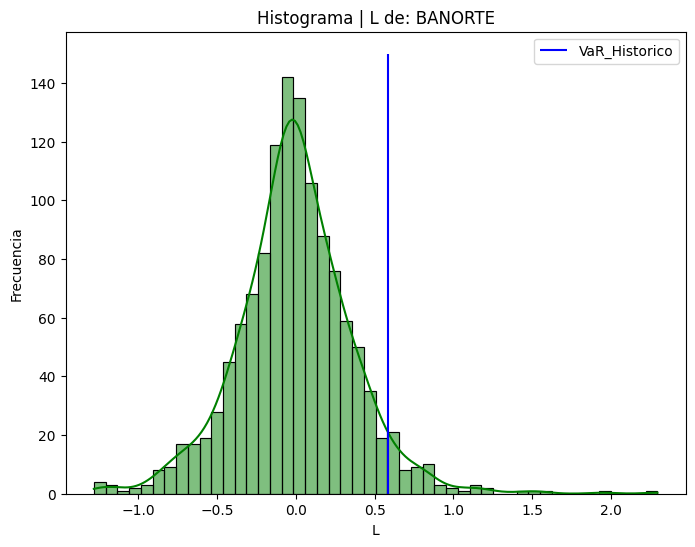

In [ ]:
B_vaR_95=VaR_historico('BANORTE','green',95)

 VaR paramétrico a un nivel de confianza del 99%





El VaR Paramétrico Anual al 99.0% es: 84.998939%


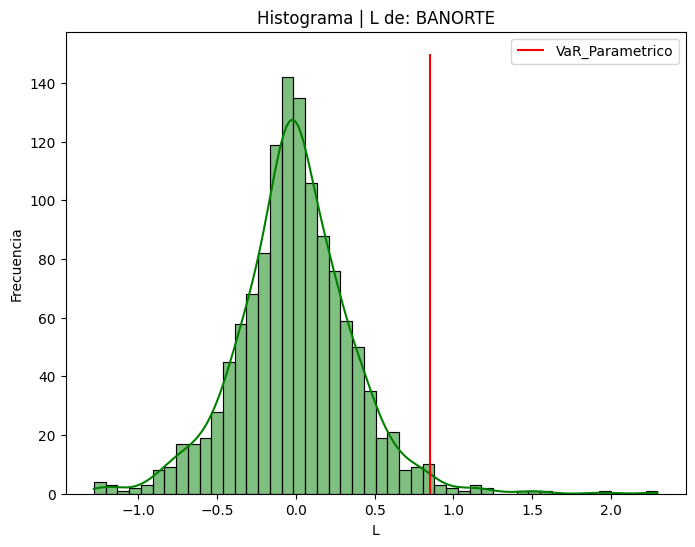

In [ ]:
B_vaR_99=VaR_parametrico('BANORTE','green',0.01)

Para el $VaR$ Historico de Banorte teneos que solamente $95\%$ de las veces nuestras perdidas no superaran el $58.290405\%$ anualmente.
Para el $VaR$ parametrico de Banorte tenemos que solamente el $99\%$ de las veces nuestras pérdidas no superaran el $84.998939\%$

El VaR al $99\%$ es más conservador al de $95\%$ ya que queremos asumir un riesgo menor de la pérdida, aunque el VaR historico al 95% es menor al del VaR parametrico al 99% lo que quiere decir que con el VaR historico tendremos menos pérdidas

##ACTIVO 2. INBURSA

Funcion de utilidad Nominal

In [ ]:
L_INBURSA=pd.DataFrame(-df['INBURSA_rend'])
L_INBURSA.columns=['L_INBURSA_rend']
for i in df['INBURSA']:
  L_INBURSA['L_INBURSA_monetaria'] =(100*df['INBURSA']-100*df['INBURSA'].shift(1))*(-1)
L_INBURSA

,L_INBURSA_rend,L_INBURSA_monetaria
0,-2.567876,NaN
1,-3.083102,-34.000015
2,2.081456,22.999954
3,-6.281727,-69.999886
4,-1.237638,-14.000130
...,...,...
1253,-0.741902,-14.999771
1254,-2.212625,-45.000076
1255,0.637198,13.000107
1256,-0.637198,-13.000107


VaR histórico anual a un nivel de confianza del 99.5%

El VaR Histórico anual al 99.5% es: 108.888163%


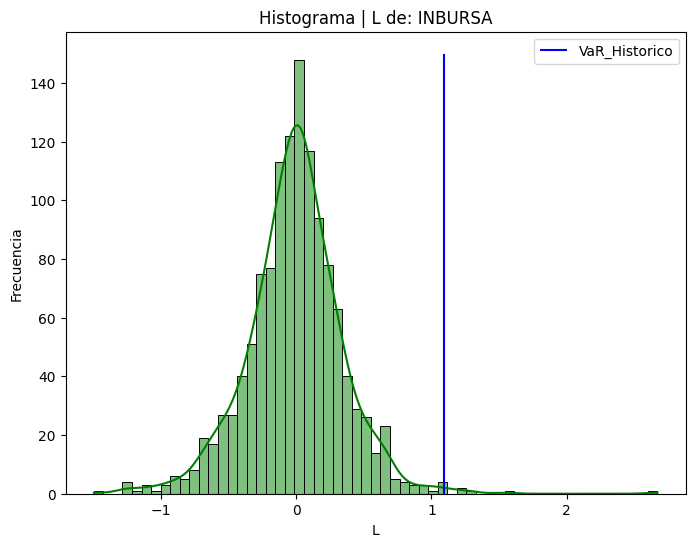

In [ ]:
I_Var_99_5=VaR_historico('INBURSA','green',99.5)

VaR Monte Carlo a un nivel de confianza del 95%

El VaR Monte Carlo al  95 % anual para  INBURSA  es: $29.0063
En porcentaje 57.781560247893935 %
Predicción precio:  50.23469163685495


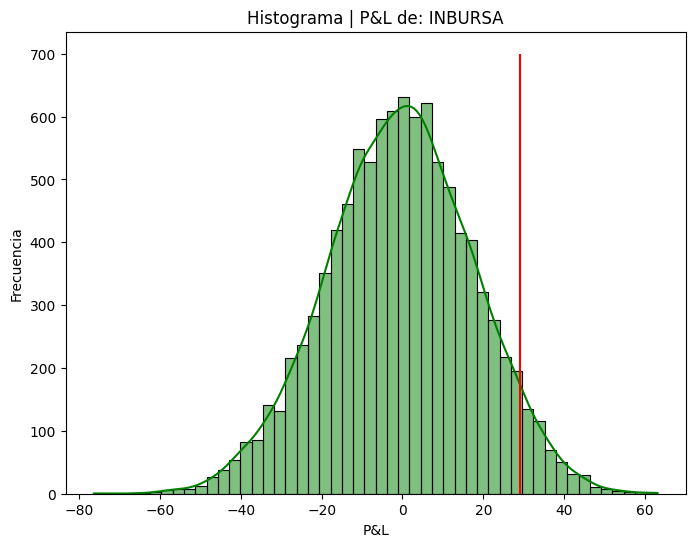

In [ ]:
VaR_m_Inbursa= VaR_Montecarlo('INBURSA',95)

Para el $VaR$ Historico de Inbursa teneos que solamente $99.5\%$ de las veces nuestras perdidas no superaran el $ 108.888163\%$ anualmente.
Para el $VaR$ Monte Carlo de Inbursa tenemos que solamente el $95\%$ de las veces nuestras pérdidas no superaran el $57.83411540816664 \%$

El VaR al $99.5\%$ es más conservador al de $95\%$ ya que queremos asumir un riesgo menor de la pérdida, el VaR historico al 99.5% es mayor al del VaR Monte Carlo al 99.5% lo que quiere decir que con el VaR historico tendremos mayor probabiliad de pérdidas y más grandes que con el VaR Monte Carlo

##Activo 3. GRUMA

Funcion de utilidad Nominal

In [ ]:
L_GRUMA=pd.DataFrame(-df['GRUMA_rend'])
L_GRUMA.columns=['L_GRUMA_rend']
for i in df['GRUMA']:
  L_GRUMA['L_GRUMA_monetaria'] =(100*df['GRUMA']-100*df['GRUMA'].shift(1))*(-1)
L_GRUMA

,L_GRUMA_rend,L_GRUMA_monetaria
0,-1.007695,NaN
1,1.058198,83.999634
2,-1.347178,-107.000732
3,-2.411726,-192.999268
4,-0.310706,-25.000000
...,...,...
1253,-5.101706,-617.999268
1254,-4.831421,-597.000122
1255,1.237394,154.000854
1256,-3.169557,-395.999146


 VaR paramétrico anual a un nivel de confianza del 90%



El VaR Paramétrico Anual al 90.0% es: 33.513069%


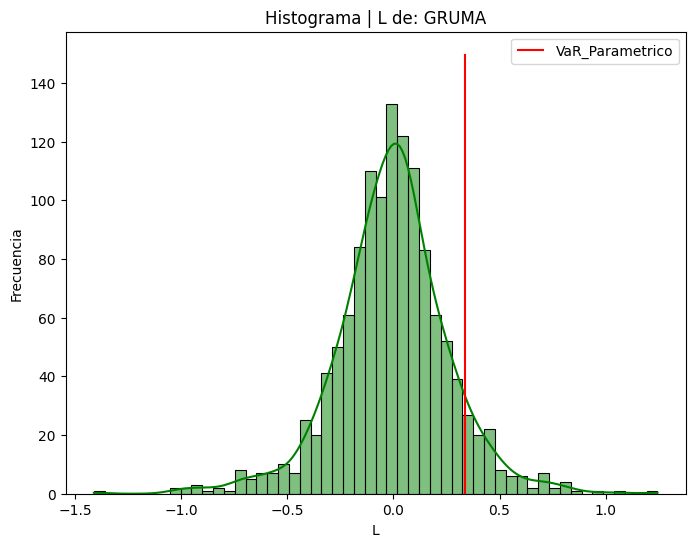

In [ ]:
Gruma_vaR_90=VaR_parametrico('GRUMA','green',0.1)

 VaR Monte Carlo a un nivel de confianza del 95%

El VaR Monte Carlo al  95 % anual para  GRUMA  es: $137.7729
En porcentaje 43.72077195429964 %
Predicción precio:  315.19682454644635


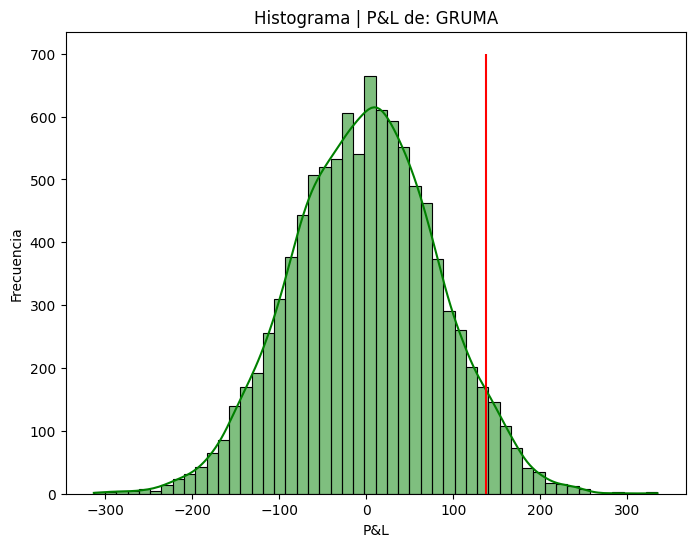

In [ ]:
Gruma_vaR_95=VaR_Montecarlo('GRUMA',95)

Para el $VaR$ paramétrico de Gruma tenemos que solamente $90\%$ de las veces nuestras perdidas no superaran el $ 33.513069 \%$ anualmente.

Para el $VaR$ Monte Carlo de Gruma tenemos que solamente el $95\%$ de las veces nuestras pérdidas no superaran el $43.00333784406764 \%$

El VaR al $95\%$ es más conservador al de $90\%$ lo que nos da un posible pérdida mayor, ya que queremos asegurarnos que una cantidad menor de días tengamos una pérdida superior a una cierta cantidad, además en el caso del VaR Monte Carlo el valor que obtenemos varia un poco, ya que como es un método estocástico los valores varian por cada vez que hagamos las simulaciones, dandonos una mayor variabilidad en el valor

##ACTIVO 4. TELEVISA

Funcion de utilidad Nominal

In [ ]:
L_TELEVISA=pd.DataFrame(-df['TELEVISA_rend'])
L_TELEVISA.columns=['L_TELEVISA_rend']
for i in df['TELEVISA']:
  L_TELEVISA['L_TELEVISA_monetaria'] =(100*df['TELEVISA']-100*df['TELEVISA'].shift(1))*(-1)
L_TELEVISA

,L_TELEVISA_rend,L_TELEVISA_monetaria
0,-1.660340,NaN
1,2.315652,38.999939
2,1.495757,25.000000
3,1.082515,18.000031
4,-2.876347,-47.999954
...,...,...
1253,-1.941755,-7.999992
1254,-0.483080,-1.999950
1255,-0.241202,-1.000023
1256,-0.962464,-3.999996


VaR Paramétrico

El VaR Paramétrico Anual al 48.404167022725844% es: -0.093749%


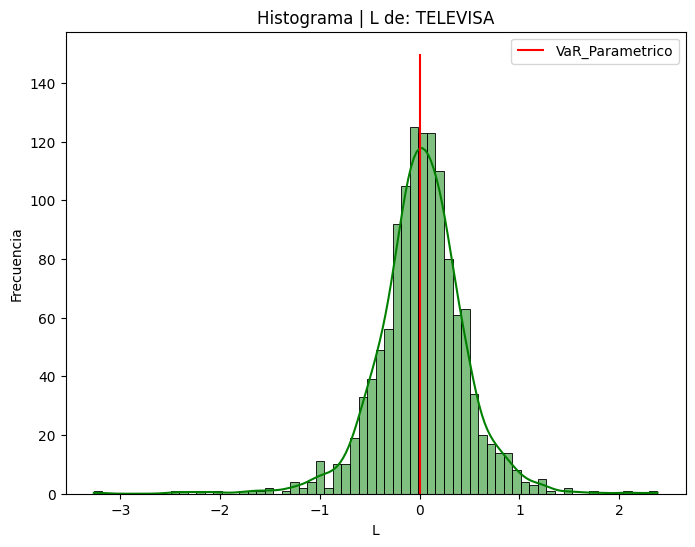

In [ ]:
#Calculamos el alpha adecuada
alpha = retornos[3]/7.091288
alpha2 = norm.cdf(alpha)
Televisa_VaR=VaR_parametrico('TELEVISA','green',alpha2+0.031)

En este caso podemos ver que a una confianza del 48.40% no tendremos pérdidas en ningun día, el problema sigue siendo que esto no ocurrirá la mayoría del tiempo y por lo tanto no es un var muy confiable porque solo contempla muy pocos escenarios

VaR Histórico

El VaR Histórico anual al 47% es: 0.0%


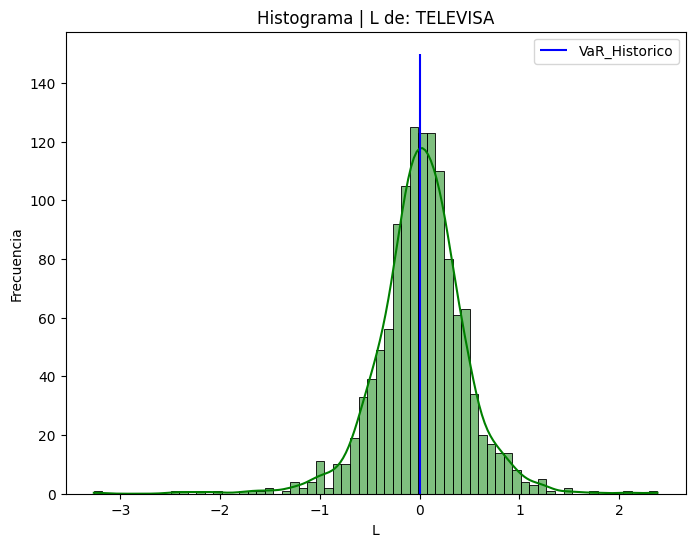

In [ ]:
Televisa_VaR_1= VaR_historico('TELEVISA','green',47)

En este caso podemos ver que a un nivel de confianza del 47% no tendremos perdidas ya que justo estamos en el momento donde el valor en riesgo es de 0, aunque el problema esta que esto no ocurrirá en muchos casos y sería mejor analizar con una mayor confianza para tener cubierto más posibles escenarios

Podemos ver que el nivel de confianza en ambos casos es bastante similar, coincidiendo el VaR histórico y el paramétrico, siendo que a un nivel de confianza similar nos aseguramos el de al menos no tener un valor en riesgo mayor que 0, aunque el problema es precisamente que estos solo ocurrirá una porción menor de tiempo, ya que la confianza para que esto suceda es bastante baja en comparación al nivel que se suele utilizar.

##ACTIVO 5. TESLA

Funcion de utilidad Nominal

In [ ]:
L_TESLA=pd.DataFrame(-df['TESLA_rend'])
L_TESLA.columns=['L_TESLA_rend']
for i in df['TESLA']:
  L_TESLA['L_TESLA_monetaria'] =(100*df['TESLA']-100*df['TESLA'].shift(1))*(-1)
L_TESLA

,L_TESLA_rend,L_TESLA_monetaria
0,21.243523,NaN
1,-4.869329,-674.865723
2,2.783094,387.332153
3,1.934238,266.665649
4,-3.614521,-500.000000
...,...,...
1253,-7.224348,-8440.991211
1254,-1.395665,-1659.008789
1255,7.334683,8615.991211
1256,12.306156,13900.000000


 VaR Monte Carlo anual a un nivel de confianza del 99.5%

El VaR Monte Carlo al  99.5 % anual para  TESLA  es: $4244.5779
En porcentaje 152.58660485954823 %
Predicción precio:  2785.9425334731354


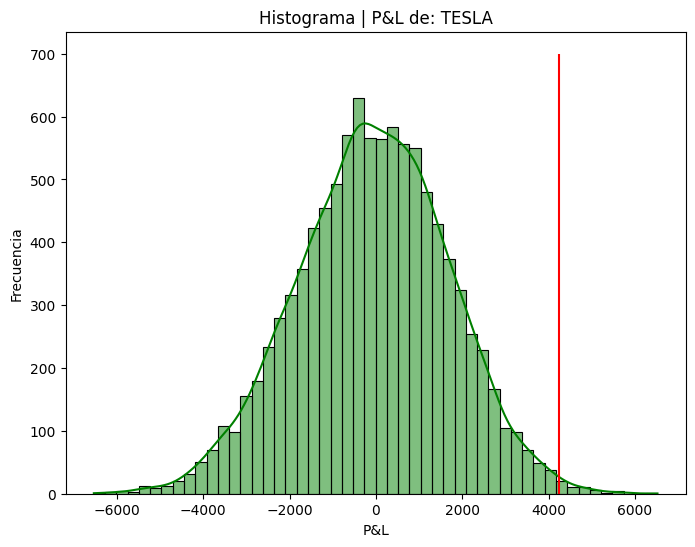

In [ ]:
Tesla_vaR_99_5=VaR_Montecarlo('TESLA',99.5)

Como podemos ver el valor en riesgo bajo Monte Carlo es mayor que la reserva del 10% que tenemos del activo, por lo tanto este activo no puede alcanzar una calificación BBB

 VaR histórico anual a un nivel de confianza del 99.5%

El VaR Histórico anual al 99.5% es: 219.943462%


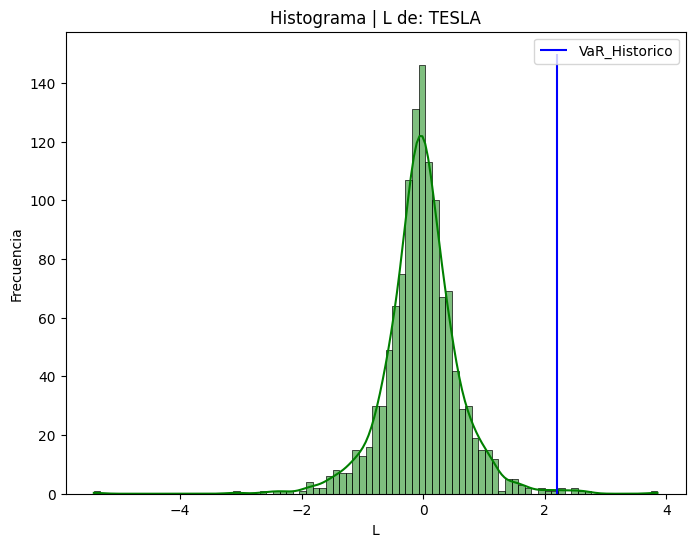

In [ ]:
I_Tesla_VaR_99_5= VaR_historico('TESLA','green',99.5)

Como podemos ver el valor en riesgo bajo los datos históricos es mayor que la reserva del 10% que tenemos del activo, por lo tanto este activo no puede alcanzar una calificación BBB

Podemos ver que en este caso calculando el VaR por cualquiera de las dos formas obtenemos que el activo en cuestión no podría alcanzar una calificación al menos BBB, lo que significa que sería un activo bastante riesgoso en el mercado, lo cual tiene sentido ya que Tesla al ser una empresa bastante ligada a la especulación su valor real puede estar lejos de las expectativas de los inversionistas, y en caso de pérdida no habría forma de cubrir con una reserva solo del 10%

##7. Forma el portafolio de mínima varianza y determine para el portafolio:


###• VaR histórico anual al 99.5% e interprete

In [ ]:
df_1 = yf.download(emisora, start = fi, end = ff)['Close'].reset_index()
df_1['Date'] = pd.to_datetime(df_1['Date'],dayfirst = True)
df_1

[*********************100%%**********************]  5 of 5 completed


Ticker,Date,GFINBURO.MX,GFNORTEO.MX,GRUMAB.MX,TLEVISACPO.MX,TSLA.MX
0,2019-04-03,27.120001,108.949997,198.070007,42.020000,373.556000
1,2019-04-04,27.400000,112.760002,198.869995,42.299999,343.124664
2,2019-04-05,27.740000,116.150002,198.029999,41.910000,349.873322
3,2019-04-08,27.510000,118.830002,199.100006,41.660000,346.000000
4,2019-04-09,28.209999,118.599998,201.029999,41.480000,343.333344
...,...,...,...,...,...,...
1254,2024-03-26,50.619999,177.440002,305.940002,10.340000,2963.429932
1255,2024-03-27,51.070000,176.660004,311.910004,10.360000,2980.020020
1256,2024-04-01,50.939999,175.679993,310.369995,10.370000,2893.860107
1257,2024-04-02,51.070000,179.139999,314.329987,10.410000,2754.860107


In [ ]:
df_1.columns = ['Fecha', 'INBURSA' ,'BANORTE','GRUMA', 'TELEVISA','TESLA']

In [ ]:
for i in df_1.columns[1:]:
  df_1[i + '_rend'] = np.log(df_1[i]/df_1[i].shift(1))

In [ ]:
df_1.dropna(inplace = True)
df_1.reset_index(inplace = True, drop = True)

In [ ]:
df_1

,Fecha,INBURSA,BANORTE,GRUMA,TELEVISA,TESLA,INBURSA_rend,BANORTE_rend,GRUMA_rend,TELEVISA_rend,TESLA_rend
0,2019-04-04,27.400000,112.760002,198.869995,42.299999,343.124664,0.010272,0.034373,0.004031,0.006641,-0.084974
1,2019-04-05,27.740000,116.150002,198.029999,41.910000,349.873322,0.012332,0.029621,-0.004233,-0.009263,0.019477
2,2019-04-08,27.510000,118.830002,199.100006,41.660000,346.000000,-0.008326,0.022811,0.005389,-0.005983,-0.011132
3,2019-04-09,28.209999,118.599998,201.029999,41.480000,343.333344,0.025127,-0.001937,0.009647,-0.004330,-0.007737
4,2019-04-10,28.350000,117.040001,201.279999,41.959999,348.333344,0.004951,-0.013241,0.001243,0.011505,0.014458
...,...,...,...,...,...,...,...,...,...,...,...
1253,2024-03-26,50.619999,177.440002,305.940002,10.340000,2963.429932,0.002968,0.042599,0.020407,0.007767,0.028897
1254,2024-03-27,51.070000,176.660004,311.910004,10.360000,2980.020020,0.008851,-0.004406,0.019326,0.001932,0.005583
1255,2024-04-01,50.939999,175.679993,310.369995,10.370000,2893.860107,-0.002549,-0.005563,-0.004950,0.000965,-0.029339
1256,2024-04-02,51.070000,179.139999,314.329987,10.410000,2754.860107,0.002549,0.019504,0.012678,0.003850,-0.049225


In [ ]:
#Vector de rendimientos diarios
retornos2 =  df_1[['INBURSA_rend' ,'BANORTE_rend','GRUMA_rend', 'TELEVISA_rend','TESLA_rend']].mean().values
retornos2

rend_anual2=pd.DataFrame(retornos2,columns=['Vector de rendimientos anuales'],index=['E_INBURSA'	,'E_BANORTE',	'E_GRUMA','E_TELEVISA','E_TESLA'])
rend_anual2

,Vector de rendimientos anuales
E_INBURSA,0.000489
E_BANORTE,0.000390
E_GRUMA,0.000369
E_TELEVISA,-0.001070
E_TESLA,0.001596


In [ ]:
#Matriz de Varianzas y covarianza
matriz_var2 = df_1[['INBURSA_rend' ,'BANORTE_rend','GRUMA_rend', 'TELEVISA_rend','TESLA_rend']].cov().values
mvc2=pd.DataFrame(matriz_var2,index=['INBURSA' ,'BANORTE','GRUMA', 'TELEVISA','TESLA'],columns=['INBURSA' ,'BANORTE','GRUMA', 'TELEVISA','TESLA'])

mvc2

,INBURSA,BANORTE,GRUMA,TELEVISA,TESLA
INBURSA,0.000498,0.000217,0.000090,0.000243,0.000069
BANORTE,0.000217,0.000538,0.000056,0.000199,0.000109
GRUMA,0.000090,0.000056,0.000281,0.000100,0.000065
TELEVISA,0.000243,0.000199,0.000100,0.000805,0.000185
TESLA,0.000069,0.000109,0.000065,0.000185,0.001571


In [ ]:
#Calculamos el portafolio de mínima varianza
matriz_var_ext2 = np.append(np.append(matriz_var2, [np.array([1,1,1,1,1,])], axis = 0),np.array([[1],[1],[1],[1],[1],[0]]), axis=1)
matriz_var_ext2

array([[0.00049794, 0.00021667, 0.00009017, 0.00024337, 0.00006867,
        1.        ],
       [0.00021667, 0.00053788, 0.00005589, 0.00019857, 0.00010885,
        1.        ],
       [0.00009017, 0.00005589, 0.00028087, 0.00010035, 0.00006457,
        1.        ],
       [0.00024337, 0.00019857, 0.00010035, 0.00080458, 0.00018541,
        1.        ],
       [0.00006867, 0.00010885, 0.00006457, 0.00018541, 0.00157122,
        1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.        ]])

In [ ]:
aux2 = np.array([0,0,0,0,0,1])
aux2

array([0, 0, 0, 0, 0, 1])

In [ ]:
#Hacemos la multiplicación de la matriz inversa con el vector auxiliar
#El vector de pesos es el que calculamos pero quitando el último que es el lambda
w_mv2 = np.dot(np.linalg.inv(matriz_var_ext2), aux2)[:-1]
w_mv2

array([0.15477456, 0.19105763, 0.53278335, 0.05235581, 0.06902865])

In [ ]:
sum(w_mv2) #Confirmamos que si suma 1

1.0

In [ ]:
data=pd.DataFrame()


In [ ]:
data['L_INBURSA']=-df_1['INBURSA_rend']
data['L_BANORTE']=-df_1['BANORTE_rend']
data['L_GRUMA']=-df_1['GRUMA_rend']
data['L_TELEVISA']=-df_1['TELEVISA_rend']
data['L_TESLA']=-df_1['TESLA_rend']


In [ ]:
data['L_PORTAFOLIO']=w_mv2[0]*data['L_INBURSA']+w_mv2[1]*data['L_BANORTE']+w_mv2[2]*data['L_GRUMA']+w_mv2[3]*data['L_TELEVISA']+w_mv2[4]*data['L_TESLA']
data

,L_INBURSA,L_BANORTE,L_GRUMA,L_TELEVISA,L_TESLA,L_PORTAFOLIO
0,-0.010272,-0.034373,-0.004031,-0.006641,0.084974,-0.004787
1,-0.012332,-0.029621,0.004233,0.009263,-0.019477,-0.006172
2,0.008326,-0.022811,-0.005389,0.005983,0.011132,-0.004859
3,-0.025127,0.001937,-0.009647,0.004330,0.007737,-0.007898
4,-0.004951,0.013241,-0.001243,-0.011505,-0.014458,-0.000499
...,...,...,...,...,...,...
1253,-0.002968,-0.042599,-0.020407,-0.007767,-0.028897,-0.021872
1254,-0.008851,0.004406,-0.019326,-0.001932,-0.005583,-0.011311
1255,0.002549,0.005563,0.004950,-0.000965,0.029339,0.006069
1256,-0.002549,-0.019504,-0.012678,-0.003850,0.049225,-0.007679


El VaR Histórico anual al 99.5% es: $ 618420.811663


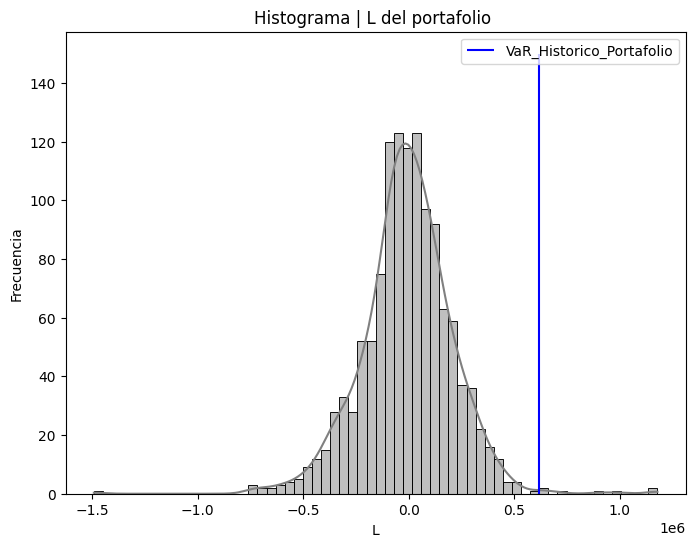

In [ ]:
#VaR Historico
VaR_Historico =math.sqrt(252)*( np.percentile(data['L_PORTAFOLIO'], 99.5))*1000000
print("El VaR Histórico anual al " + str((99.5)) + '% es: $', str(np.round(VaR_Historico,6)))


#Grafico de Histograma de L
plt.figure(figsize=(8,6))
sns.histplot(data=math.sqrt(252)* data['L_PORTAFOLIO']*1000000, kde= True,color = 'gray')
plt.vlines(x=VaR_Historico, ymin = 0, ymax=150, color = 'blue',label='VaR_Historico_Portafolio')
plt.xlabel('L')
plt.ylabel('Frecuencia')
plt.title('Histograma | L del portafolio ')
plt.legend()
plt.show()

Podemos observar que con el 99.5% de confianza nuestras perdidas anuales del portafolio de mínima varianza no superarán los $615961.872256 del millón de pesos que tenemos para invertir.

VaR (99.5%): $9905609.35


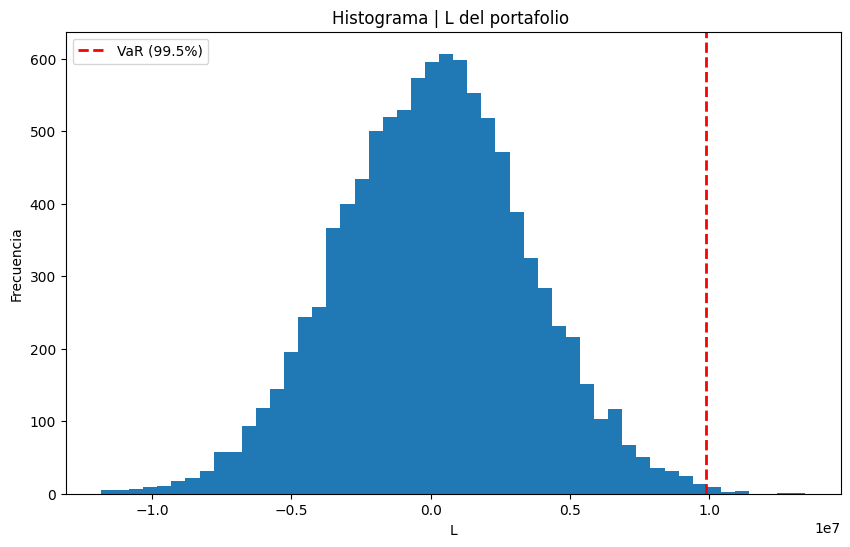

In [ ]:
#VaR Monte Carlo
import numpy as np
import matplotlib.pyplot as plt

returns = retornos
cov_matrix = matriz_var

# Función para calcular el portafolio de mínima varianza
def min_variance_portfolio(returns, cov_matrix):
    n = len(returns)
    ones = np.ones(n)
    inv_cov = np.linalg.inv(cov_matrix)
    w = np.dot(inv_cov, ones) / np.dot(ones, np.dot(inv_cov, ones))
    return w

def monte_carlo_var(returns, cov_matrix, initial_investment, num_simulations, confidence_level):
    n = len(returns)
    min_var_weights = min_variance_portfolio(returns, cov_matrix)

    portfolio_returns = []
    for _ in range(num_simulations):
        simulated_returns = np.random.multivariate_normal(returns, cov_matrix)
        portfolio_return = np.dot(min_var_weights, simulated_returns)
        portfolio_returns.append(portfolio_return)

    portfolio_returns = np.array(portfolio_returns)
    portfolio_returns.sort()


    var_index = int(num_simulations * (1 - confidence_level))
    var = initial_investment - initial_investment * portfolio_returns[var_index]

    return var, portfolio_returns

# Parámetros para la simulación de Monte Carlo
initial_investment = 1000000  # Inversión inicial
num_simulations = 10000  # Número de simulaciones
confidence_level = 0.995

# Calcular el VaR usando simulación Monte Carlo
var, portfolio_returns = monte_carlo_var(returns, cov_matrix, initial_investment, num_simulations, confidence_level)

# Imprimir el VaR calculado
print(f"VaR ({confidence_level * 100}%): ${var:.2f}")

# Visualizar la distribución de rendimientos simulados
plt.figure(figsize=(10, 6))
plt.hist(initial_investment * portfolio_returns, bins=50, alpha=0.995)
plt.axvline(x=var, color='r', linestyle='--', linewidth=2, label=f'VaR ({confidence_level * 100}%)')
plt.title('Histograma | L del portafolio ')
plt.xlabel('L')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()






En este caso podemos ver que para el Var de Monte Carlo el valor en riesgo es relativamente elevado en comparacion al previamente obtenido por el otro método y que uno de cada cien años podemos esperar tener estas perdidas, de hasta 990,560  